<a href="https://colab.research.google.com/github/SreevishnuAB/ChimpData/blob/main/Temporal_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas teneto scikit-learn
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=fd982a6d9f34e84ea422c56b7ddb5baf705c3816f326176722c9bb423787b277
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import teneto as tnt
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [ ]:
df_wet_season = pd.read_csv("drive/MyDrive/Colab Notebooks/pai_by_pairs_wet_season.csv", dtype="str")
df_dry_season = pd.read_csv("drive/MyDrive/Colab Notebooks/pai_by_pairs_dry_season.csv", dtype="str")

In [ ]:
df_ws_to_plot = df_wet_season.copy(deep=False)
df_ds_to_plot = df_dry_season.copy(deep=False)

df_ws_to_plot = df_ws_to_plot.rename(columns={'A': 'i', 'B': 'j', 'PAI': "weight"})
df_ds_to_plot = df_ds_to_plot.rename(columns={'A': 'i', 'B': 'j', 'PAI': "weight"})

df_ws_to_plot["t"] = 0
df_ds_to_plot["t"] = 1

df_ws_to_plot = df_ws_to_plot.loc[:, ["i", "j", "t", "weight"]]
df_ds_to_plot = df_ds_to_plot.loc[:, ["i", "j", "t", "weight"]]

In [ ]:
df_ws_to_plot

,i,j,t,weight
0,alizeti,bingwa,0,9.520256718812675
1,almasi,bingwa,0,9.520256718812675
2,baseka,mbawa,0,0.5705974275754297
3,baseka,dhahabu,0,0.5883247262962198
4,baseka,unid1,0,10.099574468085107
...,...,...,...,...
136,wingu,corona,0,0.9033650579100398
137,wingu,rosa,0,0.8552413475770998
138,wingu,sanaa,0,1.4160421936900387
139,wingu,kitambi,0,1.0756329617065412


In [ ]:
df_to_plot = pd.concat([df_ws_to_plot, df_ds_to_plot])
df_to_plot

,i,j,t,weight
0,alizeti,bingwa,0,9.520256718812675
1,almasi,bingwa,0,9.520256718812675
2,baseka,mbawa,0,0.5705974275754297
3,baseka,dhahabu,0,0.5883247262962198
4,baseka,unid1,0,10.099574468085107
...,...,...,...,...
251,wingu,baseka,1,0.7962413060885599
252,zai,mosi,1,0.8523439308530627
253,zai,sanaa,1,1.0933689574701149
254,zai,rosa,1,0.743222175081318


In [ ]:
unique_names = set(df_to_plot["i"].values).union(set(df_to_plot["j"].values))
unique_names

{'alizeti',
 'almasi',
 'baseka',
 'bingwa',
 'bonge',
 'corona',
 'dhahabu',
 'elisha',
 'imba',
 'joto',
 'jua',
 'kasolya',
 'kinanda',
 'kinundi',
 'kitambi',
 'kovujicho',
 'kukolon',
 'kukulon',
 'maisha',
 'maua',
 'mbawa',
 'mbaya',
 'mosi',
 'rosa',
 'samaki',
 'sanaa',
 'unid1',
 'uyoga',
 'waiti',
 'wingu',
 'zai'}

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(list(map(lambda x: [x], unique_names)))
encoded_names = encoder.transform(list(map(lambda x: [x], unique_names)))
encoded_names

array([[ 2.],
       [13.],
       [ 7.],
       [14.],
       [16.],
       [28.],
       [ 8.],
       [27.],
       [10.],
       [30.],
       [29.],
       [11.],
       [ 3.],
       [26.],
       [18.],
       [ 0.],
       [ 5.],
       [24.],
       [ 9.],
       [ 6.],
       [12.],
       [23.],
       [19.],
       [17.],
       [20.],
       [25.],
       [15.],
       [21.],
       [ 1.],
       [22.],
       [ 4.]])

In [ ]:
inverse_enc = encoder.inverse_transform(encoded_names)
inverse_enc

enc_lookup = {k: v for k, v in zip(list(inverse_enc.flatten()), list(encoded_names.flatten()))}
inv_lookup = {k: v for k, v in zip(list(encoded_names.flatten()), list(inverse_enc.flatten()))}

In [ ]:
enc_lookup

{'baseka': 2.0,
 'kinundi': 13.0,
 'elisha': 7.0,
 'kitambi': 14.0,
 'kukolon': 16.0,
 'waiti': 28.0,
 'imba': 8.0,
 'uyoga': 27.0,
 'jua': 10.0,
 'zai': 30.0,
 'wingu': 29.0,
 'kasolya': 11.0,
 'bingwa': 3.0,
 'unid1': 26.0,
 'maisha': 18.0,
 'alizeti': 0.0,
 'corona': 5.0,
 'samaki': 24.0,
 'joto': 9.0,
 'dhahabu': 6.0,
 'kinanda': 12.0,
 'rosa': 23.0,
 'maua': 19.0,
 'kukulon': 17.0,
 'mbawa': 20.0,
 'sanaa': 25.0,
 'kovujicho': 15.0,
 'mbaya': 21.0,
 'almasi': 1.0,
 'mosi': 22.0,
 'bonge': 4.0}

In [ ]:
df_to_plot.loc[:, "i"] = encoder.transform(df_to_plot[["i"]])
df_to_plot.loc[:, "j"] = encoder.transform(df_to_plot[["j"]])
df_to_plot

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


TypeError: ignored

In [ ]:
sorted_keys = list(inv_lookup.keys())
sorted_keys.sort()
node_labels = [inv_lookup[k] for k in sorted_keys]
node_labels

['alizeti',
 'almasi',
 'baseka',
 'bingwa',
 'bonge',
 'corona',
 'dhahabu',
 'elisha',
 'imba',
 'joto',
 'jua',
 'kasolya',
 'kinanda',
 'kinundi',
 'kitambi',
 'kovujicho',
 'kukolon',
 'kukulon',
 'maisha',
 'maua',
 'mbawa',
 'mbaya',
 'mosi',
 'rosa',
 'samaki',
 'sanaa',
 'unid1',
 'uyoga',
 'waiti',
 'wingu',
 'zai']

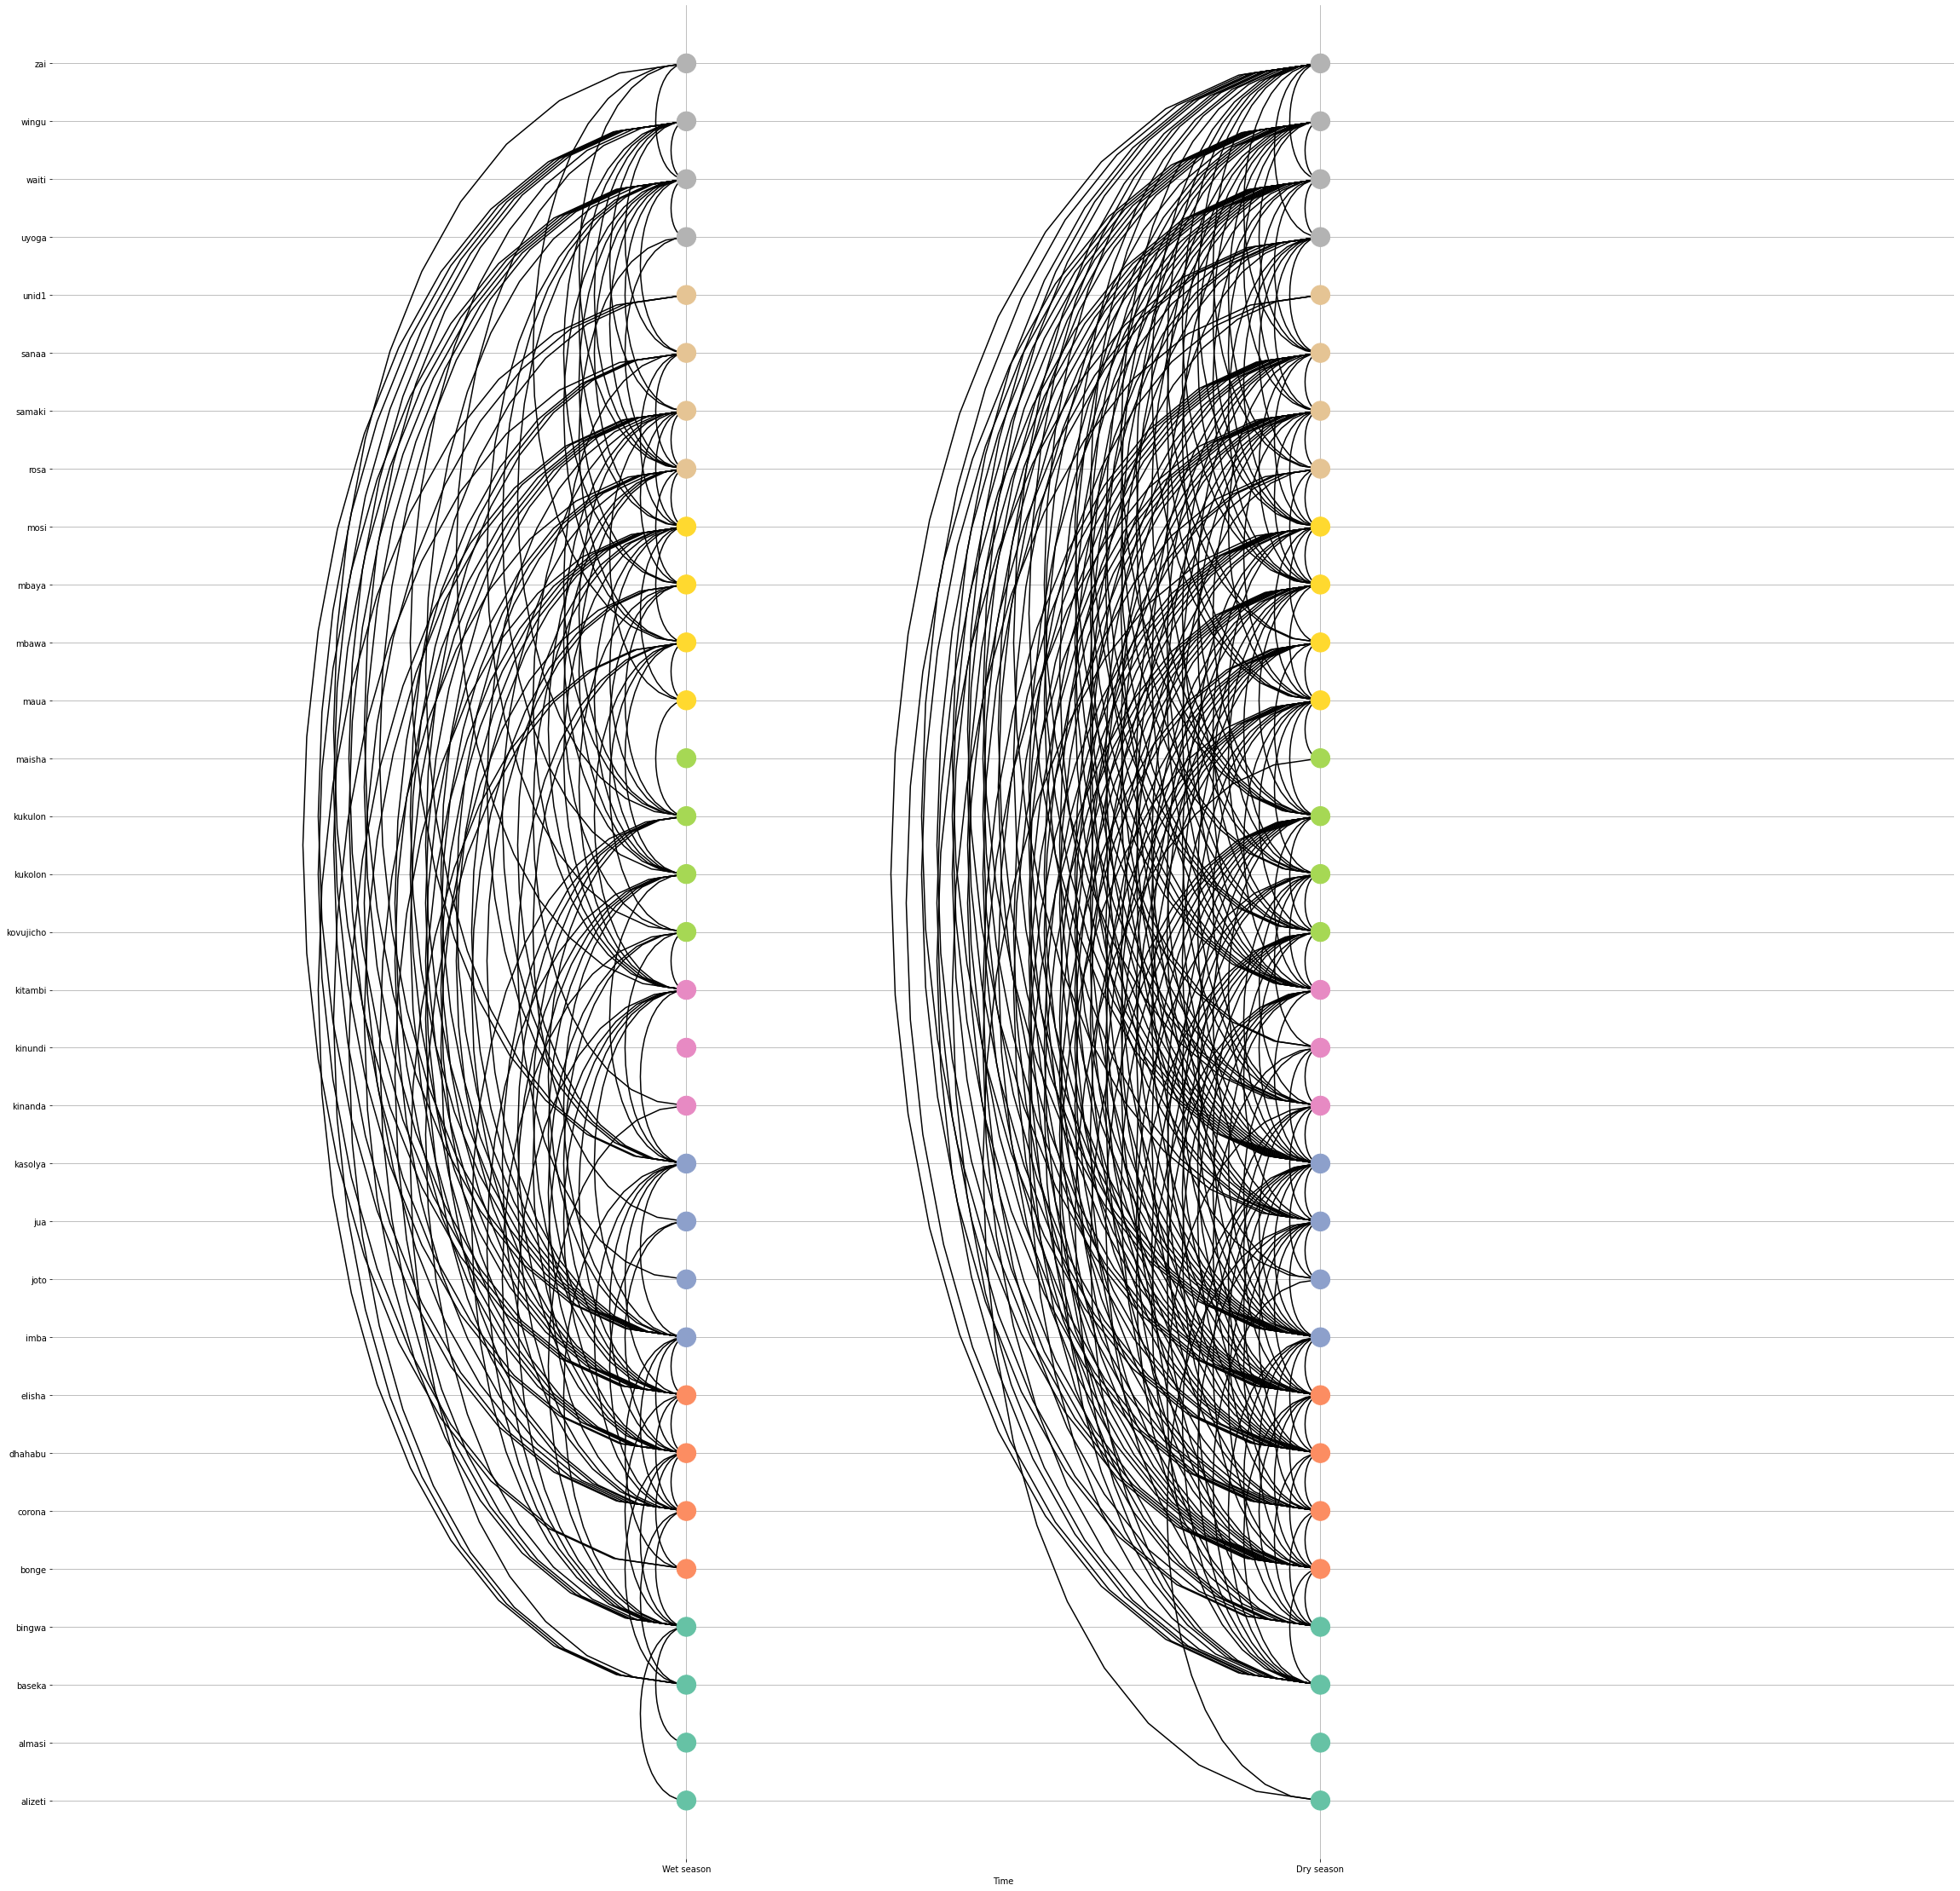

In [ ]:
t_graph = tnt.TemporalNetwork(from_df=df_to_plot)

fig, ax = plt.subplots(figsize=(40, 40))

# tnt.plot.slice_plot(t_graph, ax=ax, cmap='Pastel2', plotedgeweights=True)
t_graph.plot('slice_plot',ax=ax, cmap='Set2', nodelabels=node_labels, timelabels=["Wet season", "Dry season"], nodesize=500)
plt.show()